In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats import weightstats  as stests
import statsmodels.api as sm
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 141MB/s]


In [ ]:
df=pd.read_csv('delhivery_data.csv')
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
df.shape

(144867, 24)

In [ ]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [ ]:
df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)


Missing Values:
 data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [ ]:
# Handling missing values

for col in df.select_dtypes(include=[np.number]).columns:
  df[col].fillna(df[col].mean(),inplace=True)

for col in df.select_dtypes(include=['object']):
  df[col].fillna(df[col].mode()[0],inplace=True)

df.isnull().sum()

<ipython-input-307-4fa8986505fc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)
<ipython-input-307-4fa8986505fc>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,0
data,0
trip_creation_time,0
route_schedule_uuid,0
route_type,0
trip_uuid,0
source_center,0
source_name,0
destination_center,0
destination_name,0
od_start_time,0


In [ ]:
numeric_cols=df.select_dtypes(include=np.number).columns
df.shape


(144867, 24)

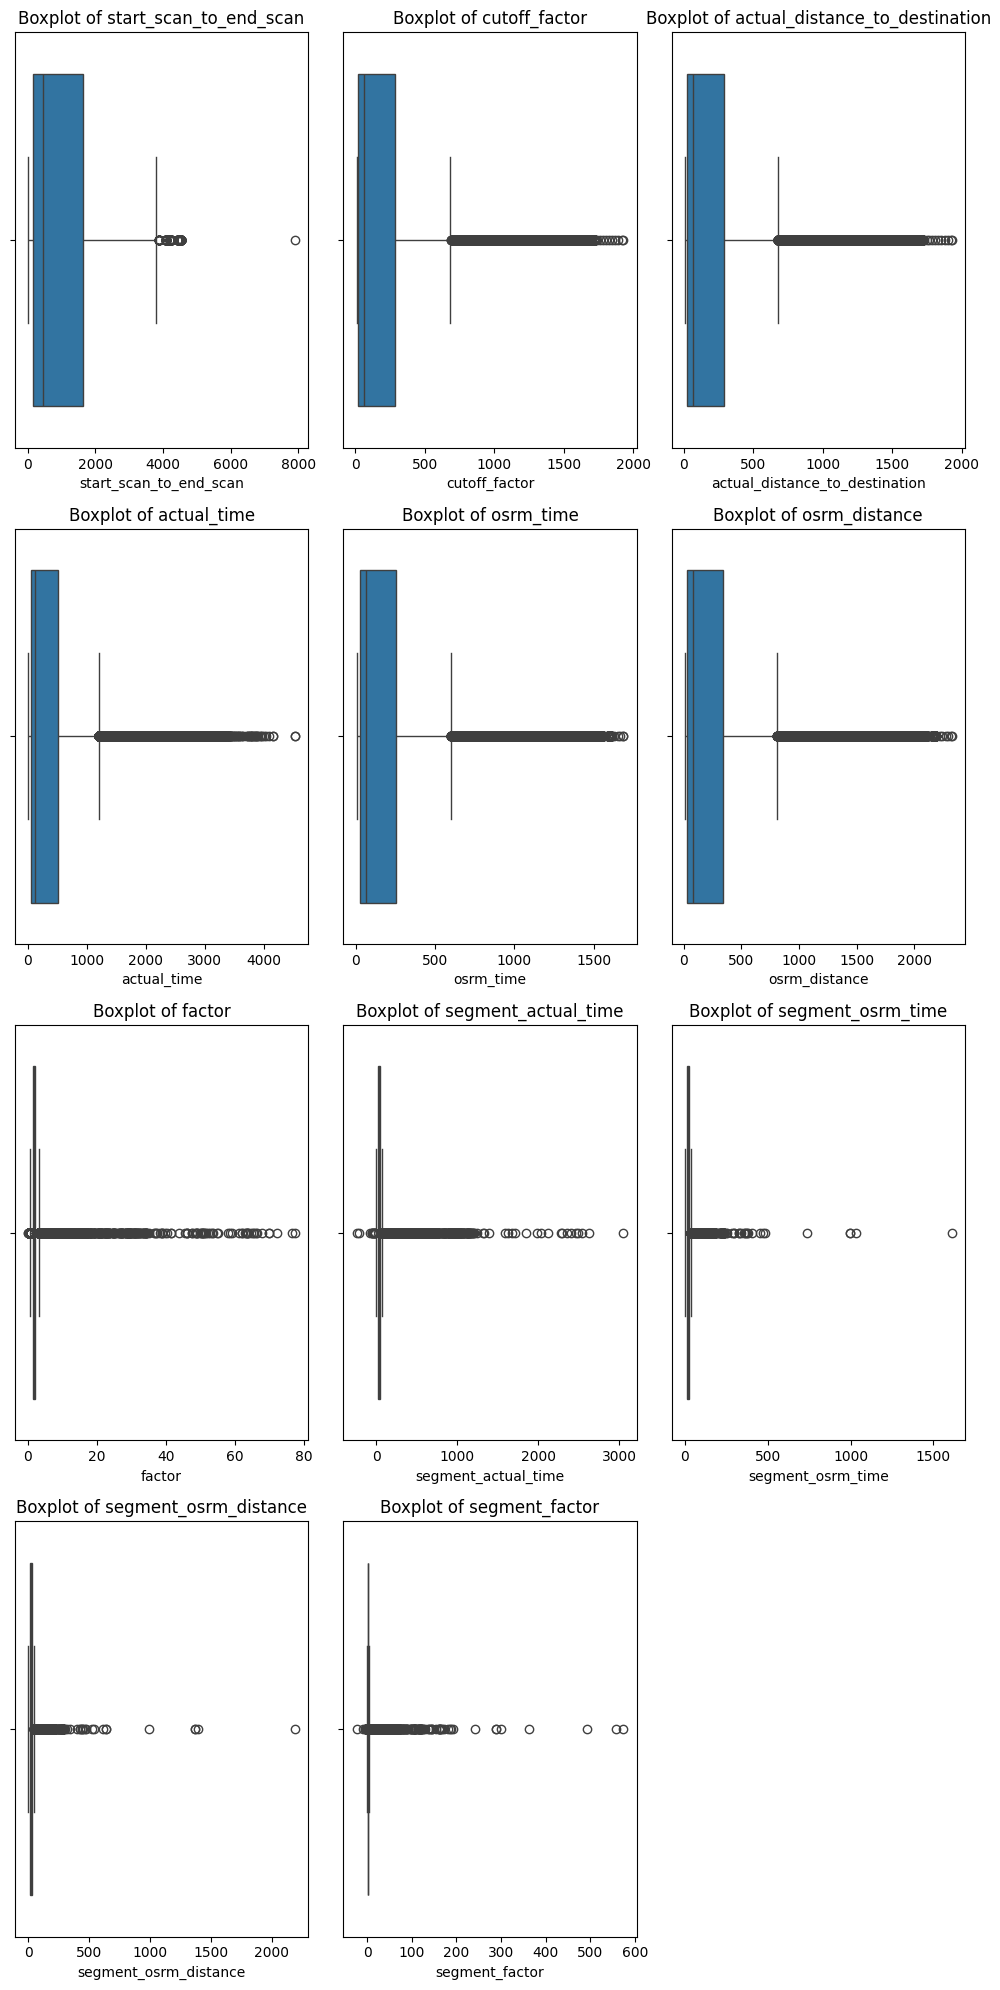

In [ ]:
#for col in numeric_cols:
 ## sns.boxplot(x=df[col])
  #plt.show()

# Set up the number of rows and columns for the grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) // n_cols) + (len(numeric_cols) % n_cols > 0)  # Calculate the number of rows needed

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric columns and plot each one in the grid
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Turn off axes for any unused subplots
for i in range(len(numeric_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()


In [ ]:
# Handle outliers using IQR method

def remove_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  return df[(df[column]>=lower_bound) & (df[column]<=upper_bound)]


In [ ]:
outlier_cleaned_df=df
for col in numeric_cols:
    outlier_cleaned_df = remove_outliers(df, col)


In [ ]:
outlier_cleaned_df.shape

(130891, 24)

In [ ]:
outlier_cleaned_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
outlier_cleaned_df['source_name'].value_counts()

,count
source_name,
Gurgaon_Bilaspur_HB (Haryana),22355
Bangalore_Nelmngla_H (Karnataka),9504
Bhiwandi_Mankoli_HB (Maharashtra),8323
Pune_Tathawde_H (Maharashtra),3796
Hyderabad_Shamshbd_H (Telangana),3189
...,...
Bhubaneswar_Patia (Orissa),1
Delhi_Mangol_DC (Delhi),1
Hajo_Sardala_D (Assam),1


In [ ]:
#Feature Extraction
# Extract city and state from source_name
outlier_cleaned_df['source_city'] = outlier_cleaned_df['source_name'].str.split('_').str[0]
outlier_cleaned_df['source_state'] = outlier_cleaned_df['source_name'].str.extract(r'\((.*?)\)$')[0]

# Extract city and state from destination_name
outlier_cleaned_df['destination_city'] = outlier_cleaned_df['destination_name'].str.split('_').str[0]
outlier_cleaned_df['destination_state'] = outlier_cleaned_df['destination_name'].str.extract(r'\((.*?)\)$')[0]

outlier_cleaned_df[['source_city','source_state','destination_city','destination_state']]

<ipython-input-315-5f1cafbf20d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_cleaned_df['source_city'] = outlier_cleaned_df['source_name'].str.split('_').str[0]
<ipython-input-315-5f1cafbf20d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_cleaned_df['source_state'] = outlier_cleaned_df['source_name'].str.extract(r'\((.*?)\)$')[0]
<ipython-input-315-5f1cafbf20d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,source_city,source_state,destination_city,destination_state
0,Anand,Gujarat,Khambhat,Gujarat
1,Anand,Gujarat,Khambhat,Gujarat
2,Anand,Gujarat,Khambhat,Gujarat
3,Anand,Gujarat,Khambhat,Gujarat
4,Anand,Gujarat,Khambhat,Gujarat
...,...,...,...,...
144861,Sonipat,Haryana,Gurgaon,Haryana
144862,Sonipat,Haryana,Gurgaon,Haryana
144863,Sonipat,Haryana,Gurgaon,Haryana
144864,Sonipat,Haryana,Gurgaon,Haryana


In [ ]:
outlier_cleaned_df[['trip_uuid','route_type','od_end_time']]

,trip_uuid,route_type,od_end_time
0,trip-153741093647649320,Carting,2018-09-20 04:47:45.236797
1,trip-153741093647649320,Carting,2018-09-20 04:47:45.236797
2,trip-153741093647649320,Carting,2018-09-20 04:47:45.236797
3,trip-153741093647649320,Carting,2018-09-20 04:47:45.236797
4,trip-153741093647649320,Carting,2018-09-20 04:47:45.236797
...,...,...,...
144861,trip-153746066843555182,Carting,2018-09-20 23:32:09.618069
144862,trip-153746066843555182,Carting,2018-09-20 23:32:09.618069
144863,trip-153746066843555182,Carting,2018-09-20 23:32:09.618069
144864,trip-153746066843555182,Carting,2018-09-20 23:32:09.618069


In [ ]:
normalized_df=outlier_cleaned_df
scaler=MinMaxScaler()
normalized_df[numeric_cols]=scaler.fit_transform(outlier_cleaned_df[numeric_cols])

<ipython-input-317-6aa3ecbe4317>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df[numeric_cols]=scaler.fit_transform(outlier_cleaned_df[numeric_cols])


In [ ]:
# Extract features from trip_creation_time
normalized_df['trip_creation_time'] = pd.to_datetime(normalized_df['trip_creation_time'])
normalized_df['trip_month'] = normalized_df['trip_creation_time'].dt.month
normalized_df['trip_day'] = normalized_df['trip_creation_time'].dt.day
normalized_df['trip_hour'] = normalized_df['trip_creation_time'].dt.hour

# Calculate delivery times and discrepancies
normalized_df['total_delivery_time'] = (pd.to_datetime(normalized_df['od_end_time']) - pd.to_datetime(normalized_df['od_start_time'])).dt.total_seconds()
normalized_df['time_discrepancy'] = normalized_df['start_scan_to_end_scan'] - normalized_df['total_delivery_time']

<ipython-input-318-451d2fde25e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df['trip_creation_time'] = pd.to_datetime(normalized_df['trip_creation_time'])
<ipython-input-318-451d2fde25e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df['trip_month'] = normalized_df['trip_creation_time'].dt.month
<ipython-input-318-451d2fde25e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

After speculation and comparision within start_scan_to_end_scan and total_delivery_time we came to know that start_scan_to_end_scan is in days.

In [ ]:
normalized_df['total_delivery_time']

,total_delivery_time
0,5172.818197
1,5172.818197
2,5172.818197
3,5172.818197
4,5172.818197
...,...
144861,25661.181838
144862,25661.181838
144863,25661.181838
144864,25661.181838


In [ ]:
normalized_df['total_delivery_time']/(60*60*24)  # converted seconds to days... highly comparable to values of start_scan_to_end_scan

,total_delivery_time
0,0.059871
1,0.059871
2,0.059871
3,0.059871
4,0.059871
...,...
144861,0.297004
144862,0.297004
144863,0.297004
144864,0.297004


In [ ]:
normalized_df['start_scan_to_end_scan']

,start_scan_to_end_scan
0,0.014618
1,0.014618
2,0.014618
3,0.014618
4,0.014618
...,...
144861,0.090144
144862,0.090144
144863,0.090144
144864,0.090144


In [ ]:
normalized_df['total_delivery_time']=normalized_df['total_delivery_time']/(60*60*24)
normalized_df['total_delivery_time']

<ipython-input-322-d6ff22891557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized_df['total_delivery_time']=normalized_df['total_delivery_time']/(60*60*24)


,total_delivery_time
0,0.059871
1,0.059871
2,0.059871
3,0.059871
4,0.059871
...,...
144861,0.297004
144862,0.297004
144863,0.297004
144864,0.297004


In [ ]:
grouped=normalized_df.groupby('trip_uuid').agg({'actual_distance_to_destination':'sum','actual_time':'sum','osrm_time':'sum','osrm_distance':'sum','segment_actual_time':'sum','segment_osrm_time':'sum','segment_osrm_distance':'sum','total_delivery_time':'sum','route_type':'first','start_scan_to_end_scan':'first','trip_month':'first','trip_day':'first','trip_hour':'first','source_city':'first','source_state':'first','destination_city':'first','destination_state':'first'}).reset_index()
grouped

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_delivery_time,route_type,start_scan_to_end_scan,trip_month,trip_day,trip_hour,source_city,source_state,destination_city,destination_state
0,trip-153671041653548748,3.908823,3.219300,3.979117,3.896199,0.395936,0.570807,0.560538,27.375953,FTL,0.216833,9,12,0,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh
1,trip-153671042288605164,0.062481,0.055730,0.071599,0.060778,0.039659,0.033540,0.035377,0.548885,Carting,0.022591,9,12,0,Tumkur,Karnataka,Doddablpur,Karnataka
2,trip-153671043369099517,34.300146,26.161641,37.951671,37.405588,0.955097,1.119876,1.116024,167.819651,FTL,0.681949,9,12,0,Bangalore,Karnataka,Gurgaon,Haryana
3,trip-153671046011330457,0.001229,0.003378,0.001790,0.001281,0.007539,0.004969,0.005298,0.069788,Carting,0.017719,9,12,0,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Maharashtra
4,trip-153671052974046625,0.056326,0.072618,0.062053,0.055404,0.082596,0.057764,0.056077,0.941774,FTL,0.029236,9,12,0,Bellary,Karnataka,Hospet (Karnataka),Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14420,trip-153861095625827784,0.040756,0.029674,0.063246,0.043225,0.026876,0.034161,0.028454,0.610644,Carting,0.029236,10,3,23,Chandigarh,Punjab,Zirakpur,Punjab
14421,trip-153861104386292051,0.003723,0.003619,0.004177,0.003685,0.006883,0.005590,0.007015,0.084154,Carting,0.008859,10,3,23,FBD,Haryana,Faridabad,Haryana
14422,trip-153861106442901555,0.009951,0.055730,0.036993,0.029388,0.058014,0.047826,0.045667,0.586278,Carting,0.033887,10,3,23,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh
14423,trip-153861115439069069,0.105617,0.107841,0.205251,0.128260,0.084562,0.126708,0.099237,0.916946,Carting,0.018826,10,3,23,Tirunelveli,Tamil Nadu,Eral,Tamil Nadu


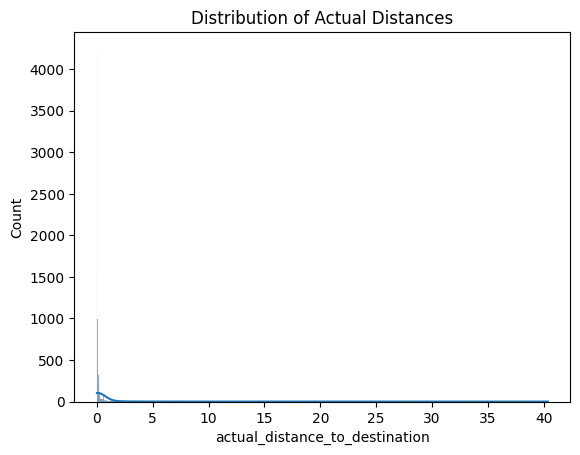

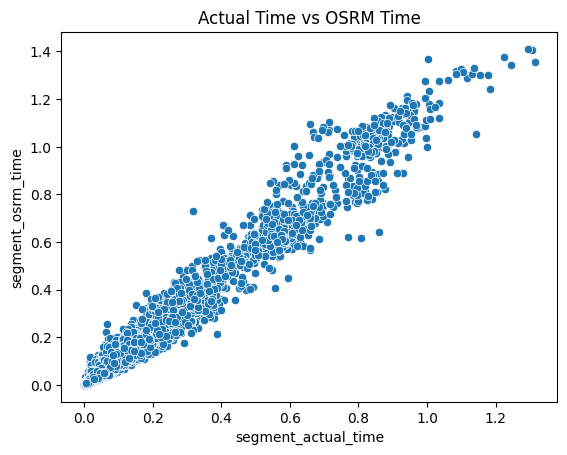

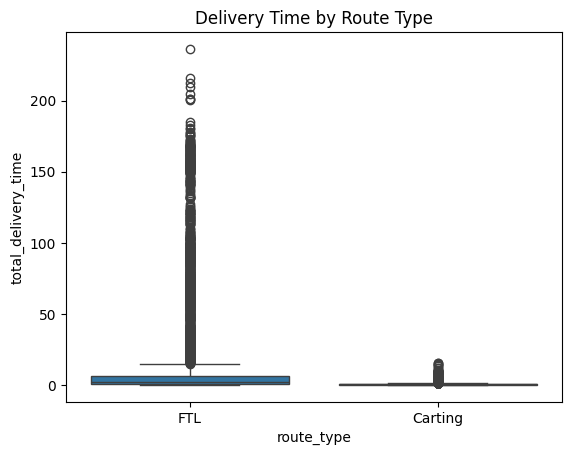

In [ ]:
# Visual Analysis
# Distribution of distances
sns.histplot(grouped['actual_distance_to_destination'], kde=True)
plt.title("Distribution of Actual Distances")
plt.show()

# Comparison of times
sns.scatterplot(x='segment_actual_time', y='segment_osrm_time', data=grouped)
plt.title("Actual Time vs OSRM Time")
plt.show()

# Boxplot for categorical variables
sns.boxplot(x='route_type', y='total_delivery_time', data=grouped)
plt.title("Delivery Time by Route Type")
plt.show()

In [ ]:
#Handling Categorical Variables
# One-hot encoding
encoded_data = pd.get_dummies(grouped, columns=['route_type'], drop_first=True)
encoded_data

,trip_uuid,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,total_delivery_time,start_scan_to_end_scan,trip_month,trip_day,trip_hour,source_city,source_state,destination_city,destination_state,route_type_FTL
0,trip-153671041653548748,3.908823,3.219300,3.979117,3.896199,0.395936,0.570807,0.560538,27.375953,0.216833,9,12,0,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,True
1,trip-153671042288605164,0.062481,0.055730,0.071599,0.060778,0.039659,0.033540,0.035377,0.548885,0.022591,9,12,0,Tumkur,Karnataka,Doddablpur,Karnataka,False
2,trip-153671043369099517,34.300146,26.161641,37.951671,37.405588,0.955097,1.119876,1.116024,167.819651,0.681949,9,12,0,Bangalore,Karnataka,Gurgaon,Haryana,True
3,trip-153671046011330457,0.001229,0.003378,0.001790,0.001281,0.007539,0.004969,0.005298,0.069788,0.017719,9,12,0,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Maharashtra,False
4,trip-153671052974046625,0.056326,0.072618,0.062053,0.055404,0.082596,0.057764,0.056077,0.941774,0.029236,9,12,0,Bellary,Karnataka,Hospet (Karnataka),Karnataka,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14420,trip-153861095625827784,0.040756,0.029674,0.063246,0.043225,0.026876,0.034161,0.028454,0.610644,0.029236,10,3,23,Chandigarh,Punjab,Zirakpur,Punjab,False
14421,trip-153861104386292051,0.003723,0.003619,0.004177,0.003685,0.006883,0.005590,0.007015,0.084154,0.008859,10,3,23,FBD,Haryana,Faridabad,Haryana,False
14422,trip-153861106442901555,0.009951,0.055730,0.036993,0.029388,0.058014,0.047826,0.045667,0.586278,0.033887,10,3,23,Kanpur,Uttar Pradesh,Kanpur,Uttar Pradesh,False
14423,trip-153861115439069069,0.105617,0.107841,0.205251,0.128260,0.084562,0.126708,0.099237,0.916946,0.018826,10,3,23,Tirunelveli,Tamil Nadu,Eral,Tamil Nadu,False


In [ ]:
#Business Insights and Recommendations
# Insights: Most common source-destination pairs (city-wise)
most_common_corridor_city_wise = grouped.groupby(['source_city', 'destination_city']).size().idxmax()
print(f"Most common corridor: {most_common_corridor_city_wise}")

# Insights: Most common source-destination pairs (state-wise)
most_common_corridor_state_wise = grouped.groupby(['source_state', 'destination_state']).size().idxmax()
print(f"Most common corridor: {most_common_corridor_state_wise}")

# Insights: Most common source-destination pairs (city-state-wise)
most_common_corridor_state_wise = grouped.groupby(['source_city','source_state','destination_city','destination_state']).size().idxmax()
print(f"Most common corridor: {most_common_corridor_state_wise}")

# Insights: Average delivery times
avg_delivery_time = grouped['total_delivery_time'].mean()
print(f"Average delivery time: {avg_delivery_time} days")

Most common corridor: ('Bengaluru', 'Bengaluru')
Most common corridor: ('Maharashtra', 'Maharashtra')
Most common corridor: ('Bengaluru', 'Karnataka', 'Bengaluru', 'Karnataka')
Average delivery time: 6.259001471990007 seconds


Hypothesis Testing

Compare the difference between total_delivery_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

PearsonRResult(statistic=0.854679188428581, pvalue=0.0)

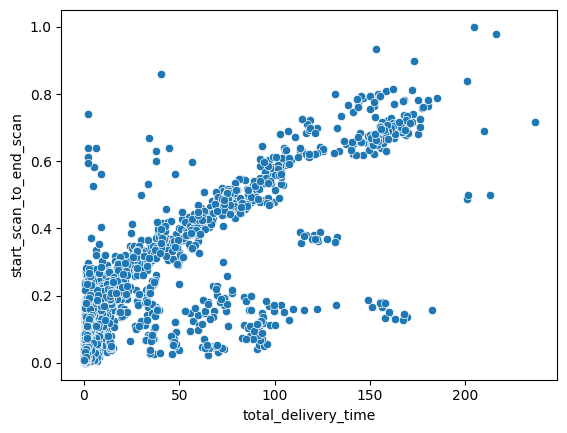

In [ ]:
a=grouped['total_delivery_time']
b=grouped['start_scan_to_end_scan']
sns.scatterplot(x=a,y=b)
pearsonr(a,b)

In [ ]:
ttest_ind(a,b)

TtestResult(statistic=33.14956120259363, pvalue=1.585426138944889e-236, df=28848.0)

Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

PearsonRResult(statistic=0.9906111563001678, pvalue=0.0)

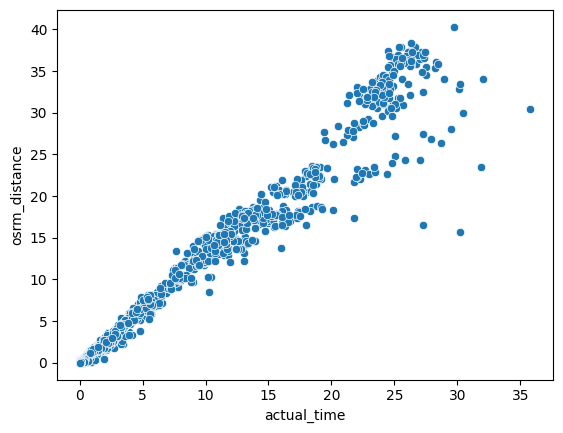

In [ ]:
a=grouped['actual_time']
b=grouped['osrm_distance']
sns.scatterplot(x=a,y=b)
pearsonr(a,b)

In [ ]:
ttest_ind(a,b)

TtestResult(statistic=-4.6026229642585585, pvalue=4.189791201900572e-06, df=28848.0)

Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

PearsonRResult(statistic=0.8936082002656014, pvalue=0.0)

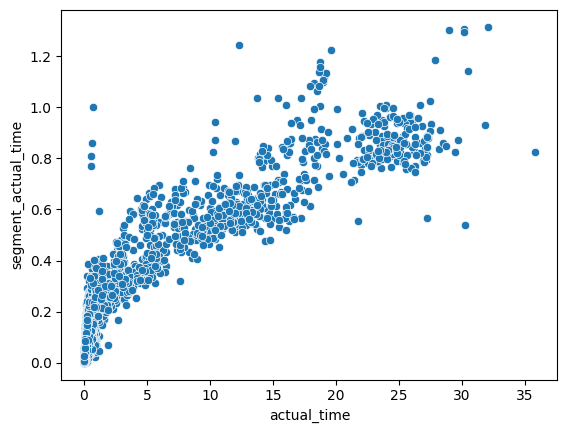

In [ ]:
a=grouped['actual_time']
b=grouped['segment_actual_time']
sns.scatterplot(x=a,y=b)
pearsonr(a,b)

In [ ]:
ttest_ind(a,b)

TtestResult(statistic=28.247976942193, pvalue=3.444930407864925e-173, df=28848.0)

Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

PearsonRResult(statistic=0.9089822302653484, pvalue=0.0)

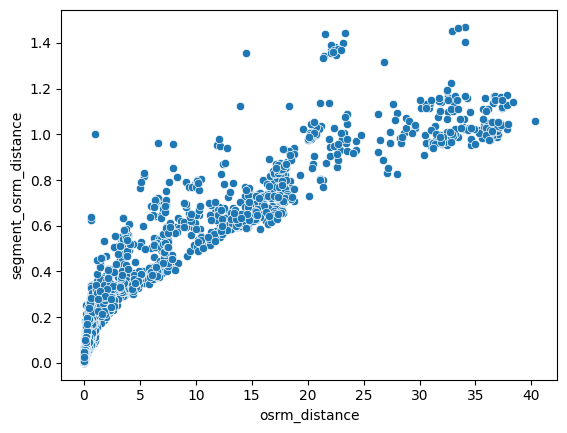

In [ ]:
a=grouped['osrm_distance']
b=grouped['segment_osrm_distance']
sns.scatterplot(x=a,y=b)
pearsonr(a,b)

In [ ]:
ttest_ind(a,b)

TtestResult(statistic=27.949949441779093, pvalue=1.2068648198563713e-169, df=28848.0)